# Implement Vanilla Gradient Descent on CE(Cross Entropy) loss




### PROLOGUE: 
Gradient Descent is where the magic happens and this optimization algorithm is used in  many ML/DL algorithms such as Linear Regression, Logistic Regression , SVM & Neural Networks.We seldom have to implement this algorithm oursleves because the libraries implement it under the hood.

Inspite of being a fundamental concept in ML , this has always been a daunting concept , especially for beginners. Theortically  it involves  Calculus and Vector Algebra but how does it all pan out in terms of code ? Implementing the  Gradient Descent algorithm helps one understand this algorithm at a granular level.



### PROJECT OBJECTIVE: 
To implement Gradient Decsent on CE Loss function from a neural network perspective


### CODE/SOLUTION SUMMARY
We will be finding the best fit sigmoid curve on the given data set using Gradient Decsent i.e we will be implementing gradient decsent on the CE loss function.Below is the step wise breakdown of the code
- We will begin by manually creating a 2D data set & visualize the data set
- Note here that at this point , we already know what the sigmoid model would be because we engineered the data set
- We will then implement Gradient Descent & see whether we can arrive at the same sigmoid curve gradient Descent algorithm
- We start at random point and and iteratvely keep reducing the loss until we arrive at the best fir curve
- Cross vaidate whether the "best fit" curve we arrived at through gradient decsnt is indeed the best fit curve.
- We will realize all the operations in matrix format because we are implemting this from a neural network perspective 

In [1]:
# Import  libraries

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random as rand
rand.seed(101)

In [2]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

In [3]:
# Lets create/engineer a  2 D data set manually with random numbers  to fit into a sigmoid curve

X=np.arange(0,100,5)
#X = rand.sample(range(0, 100), 10)
X=np.array(X)
X

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

In [4]:
YTemp= 2*X - 50
Y=1/(1 + np.exp(-YTemp))
print(Y)

[0.        0.        0.        0.        0.0000454 0.5       0.9999546
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.       ]


In [5]:
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)

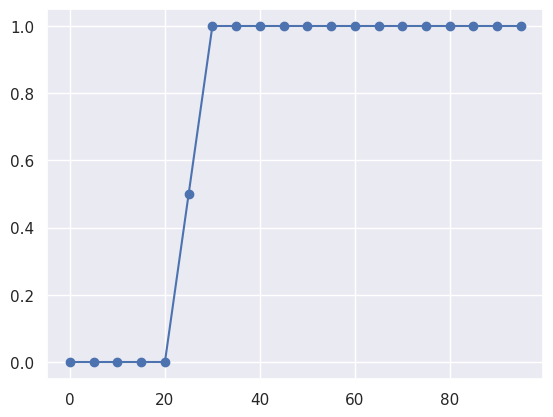

In [6]:
# Lets visualize the Actual Data Set

plt.scatter(x=X,y=Y)
plt.plot(X,Y,c='b')
plt.show()

In [7]:
# Cool , so we now know that the sigmoid curve that bst fits the data is 1/(1 +e^-(2x-50))
# We could think of this as a toy data set because in reality we never data points that actually fall on one the curve .
# However , for the objective of this notebook , its convenient.
# We have plotted both curve
# Lets see if gradient descent can arrive at the same curve  

In [8]:
# Note :
# Variables naming convention
# We have used small letters for scalars and CAPS for Vectors

In [9]:
# Lets define our loss function 

def crossEntropty_loss(Y_True,Y_Pred):
  #loss=np.sum(np.square(Y_True-Y_Pred))/Y_True.shape[0]
  #print('Y_True',Y_True)
  #print('Y_Pred',Y_Pred)
  #print('Y_True.shape[0]',Y_True.shape[0])
  epsilon = 1e-5 # Small constant to prevent log 0 from happening 
  #loss= - np.sum( (Y_Pred * (np.log(Y_True))) + ((1-Y_Pred) * (np.log(1-Y_True))))/Y_True.shape[0]
  loss= - np.sum( Y_Pred * np.log(Y_True + epsilon) + ((1-Y_Pred) * (np.log(1 - Y_True + epsilon))) )/Y_True.shape[0]
  #loss = - np.sum( t * np.log(y) + (1-t) * np.log(1-y) ) / N # Cross entropy , divided by N because over all samples

  return loss


In [10]:
# Lets define our sigmoid function on top of linear function
def sigmoidFunc(X,W):
  YTemp=W[0]*X +  W[1]
  Y=1/(1 + np.exp(-YTemp))
  return Y


In [11]:
# Start at a random weight
W=np.ones(shape=2)
W[0]=rand.randint(5,10)
W[1]=rand.randint(5,10)

In [12]:
print(W[0])
print(W[1])

9.0
6.0


In [13]:
# Now we have some random weights , lets visualize what the predicted line ...
# ... looks like with these weights agianst the actual line

2.8903229573221583


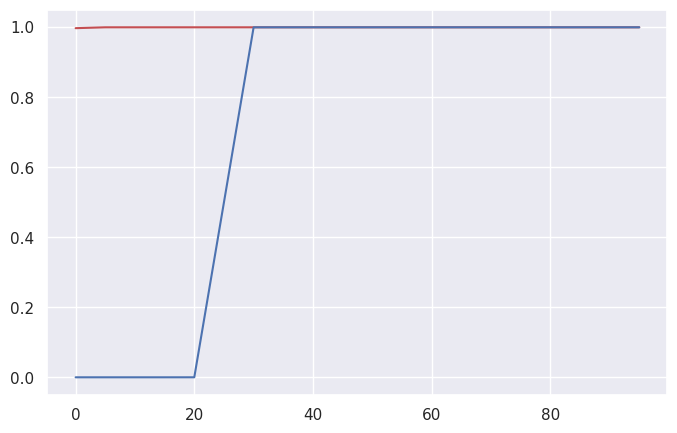

In [14]:
# Lets see what the line looks like at this point
fig = plt.figure(figsize=(8,5))
plt.plot(X,sigmoidFunc(X,W),c='r')# predicted line in red
plt.plot(X,Y,c='b')# actual line in blue
#plt.plot(X,sigmoidFunc(X,W),c='r')# predicted line in red
loss=crossEntropty_loss(sigmoidFunc(X,W),Y)
print(loss)

In [15]:
# We can see the predicted line and actual line in the above

##  Calculate Derivatives

- We would need to calculate the partial derviatives of of the two variables in the loss function which will be the two variables in the sigmoid function which are 'a' and 'b'
- For for partial derivatives will be updated in this section in the next version of this file


In [16]:
# Lets write a func to calculate these gradients
def grad(X,Y,P):
  
  # add  a dummy layer of 1 's 
  X1=np.vstack((np.ones_like(X),X))

  #calculate term in derivative which we will need later
  E=np.abs(Y-P)

  #calculate number of samples 
  N=np.shape(X)[0]

  #Calculate gradient 
  G=  1.0/N  *  X1.dot(E)/N

  return G

##  Implement Gradient Descent for 1 iteration

In [17]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
Y [0.        0.        0.        0.        0.0000454 0.5       0.9999546
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.       ]


In [18]:
# Lets use LR as 0.0001
lr=10

# Lets do one iteration and of GD and view results

P=sigmoidFunc(X,W)     #Prediction with current weights
gradient=grad(X,Y,P)  #Calculate the gradient at this point

print("gradient",gradient)

#Lets update the weights 
W1= W - lr*gradient
# Why are we subtrating here ? Because we want to go in the opposite direction of the gradient

gradient [0.01374382 0.15625114]


In [19]:
W1

array([8.86256182, 4.43748865])

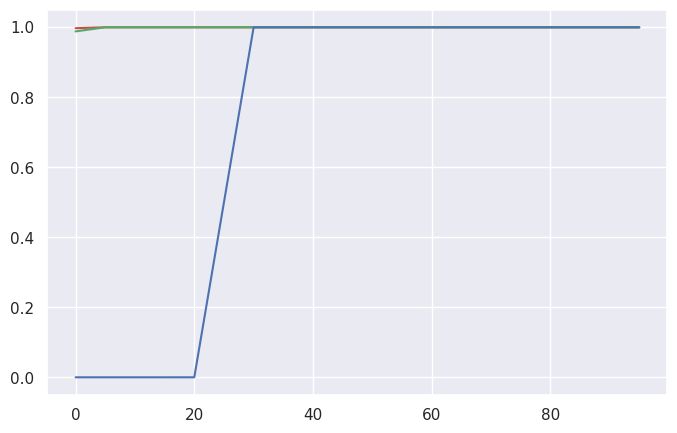

In [20]:
# Now lets plot orginal line , random line & line after first iteration in one graph
# Lets see what the line looks like at this point
fig = plt.figure(figsize=(8,5))
plt.plot(X,sigmoidFunc(X,W),c='r')# starting line in red
plt.plot(X,sigmoidFunc(X,W1),c='g')#  line after one iteration in green
plt.plot(X,Y,c='b')# actual line in blue

# Neat , we can see it took a tiny step towards the best fit line/curve , lets proceed

##  Implement Gradient Descent in its entirity

In [21]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
Y [0.        0.        0.        0.        0.0000454 0.5       0.9999546
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.       ]


deltaWtThresh 0.1


currLoss 2.8258515311780568


currLoss 2.8250037203191214


currLoss 2.8236541023470383


currLoss 2.821510550806382


currLoss 2.818118302923217


currLoss 2.812780529178923


currLoss 2.8044564711794466


currLoss 2.791655380712135


currLoss 2.7723859242675997


currLoss 2.744293890153122


currLoss 2.7051948904061693


currLoss 2.6541471322047636


currLoss 2.5927890528220408


currLoss 2.5259632972564807


currLoss 2.4605638221846124


currLoss 2.4029264741984897


currLoss 2.356636102069122


currLoss 2.3221546249116907


currLoss 2.297883025760114


currLoss 2.281470960332787


currLoss 2.2706726980493785


currLoss 2.263695268214349


currLoss 2.259239227493355


currLoss 2.2564146947466437


currLoss 2.2546328197016985


currLoss 2.2535120849008043


currLoss 2.252808515079459


currLoss 2.252367355417985


currLoss 2.2520909408535426


currLoss 2.251917830377313


currLoss 2.2518094479622612


currLoss 2.2517416034371074


currLoss 2.2516991394244936


currLoss 2.2516725630271766


currLoss 2.2516559307507817


currLoss 2.2516455220845475


currLoss 2.25163900833815


currLoss 2.2516349320783293


currLoss 2.2516323811987293


currLoss 2.2516307848916686


currLoss 2.2516297859446137


currLoss 2.2516291608151193


currLoss 2.2516287696107025


currLoss 2.2516285247847394


currLoss 2.2516283715447147


currLoss 2.2516282755887995


currLoss 2.2516282154258325


currLoss 2.2516281775584748


currLoss 2.2516281534485008


currLoss 2.251628137579119


currLoss 2.2516281261693836


currLoss 2.251628116231545


currLoss 2.251628104719821


currLoss 2.2516280875033177


currLoss 2.251628057788047


currLoss 2.251628003360163


currLoss 2.251627901513799


currLoss 2.251627709545254


currLoss 2.2516273468264267


currLoss 2.2516266609275912


currLoss 2.2516253635533134


currLoss 2.2516229093674713


currLoss 2.2516182667855658


currLoss 2.2516094844358254


currLoss 2.2515928712286764


currLoss 2.2515614460199753


currLoss 2.251502007501129


currLoss 2.2513896009623013


currLoss 2.2511770858148967


currLoss 2.250775524964255


currLoss 2.2500175315054878


currLoss 2.2485895072114097


currLoss 2.2459089958035663


currLoss 2.240911810717167


currLoss 2.23171343332579


currLoss 2.215170644435376


currLoss 2.1866209683599216


currLoss 2.140662683185293


currLoss 2.0742799595100316


currLoss 1.9917347596824158


currLoss 1.9057584666309075


currLoss 1.83063901725061


currLoss 1.7739697731314004


currLoss 1.7355399684277664


currLoss 1.7112398965355318


currLoss 1.6965235105240875


currLoss 1.6878372554502925


currLoss 1.6827866110216025


currLoss 1.6798752455907895


currLoss 1.678205365244923


currLoss 1.6772502908739373


currLoss 1.6767049317161913


currLoss 1.6763938138118661


currLoss 1.6762164203042542


currLoss 1.676115304276145


currLoss 1.6760576767915076


currLoss 1.6760248367285135


currLoss 1.6760061221793634


currLoss 1.675995455485318


currLoss 1.6759893715525522


breaking itercount 100


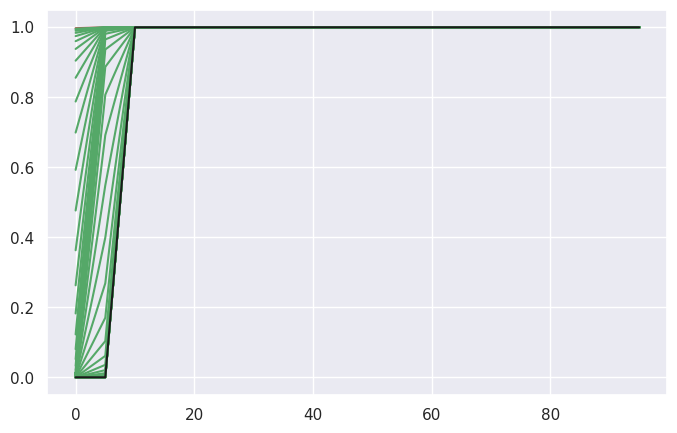

In [22]:
# Lets use LR as 0.001
lr=3
totalIterCount=100 # Total no of iterations allowed
itercount=0 #Current iteration number
deltaWtThresh=0.1 #0.006
print('deltaWtThresh',deltaWtThresh)
deltaWt=0 #Random initialization
#P=linearFunc(X,W)
#initLoss=MSE(Y,P) # This is loss with current weights

fig = plt.figure(figsize=(8,5))
# Lets plot the actual line and initial line 
plt.plot(X,sigmoidFunc(X,W),c='r')# starting line in red
#plt.plot(X,Y,c='b')# actual line in blue


# We will now do multiple iterations
# Stopping condition ? Either max iterations are reached or change in wts is less than a certain th
#But why not monitor loss and just stop when loss starts increasing , because in this case it will work , this is a simple MSE loss func
# In actuality loss functions are more complex and we are trying to code with those in mind

while(True):
    P=sigmoidFunc(X,W)     #Prediction with current weights
    gradient=grad(X,Y,P)  #Calculate the gradient at this point
    W_Updated=W - lr*gradient
    currLoss=crossEntropty_loss(Y,P)      
    print('currLoss',currLoss) #We are printing this just for info
    deltaWt=W_Updated - W
    #print('deltaWt',deltaWt)
    #print('abs',np.sum(abs(deltaWt)))

    W=W_Updated
    itercount=itercount+1
    plt.plot(X,sigmoidFunc(X,W),c='g')#  line after one iteration in green

    if(itercount>=totalIterCount):
      print('breaking itercount',itercount)
      plt.plot(X,sigmoidFunc(X,W),c='k')#  line after one iteration in green
      break
    if(np.sum(abs(deltaWt)) <= deltaWtThresh):
      print('breaking deltaWt',deltaWt)
      plt.plot(X,sigmoidFunc(X,W),c='k')#
      break
 
  
# Lets plot the actual line and initial line once again
#plt.plot(X,Y,c='b')# actual line in blue  


##  Result
- As can be seen in the graph above , the vanilla gradient descent algorithm made its way towards the best fit sigmoid through an iterative process, loss kept decreasing , It was able to come close
- Red curve indicates where it started
- Each green curve indicates one iteration
- Black curve indicates final position of the GD curve and the blue curve indicates  the actual line
- Vanilla Gradient descent ran for 150 iterations and it made its way towards the best fit curve but did not reach the optimum
- In future notebooks we can explore how adding momentum to gradient descent can help with faster convergence and better results

In [23]:
currLoss

1.6759893715525522

In [24]:
itercount

100

In [25]:
W

array([  5.67609228, -40.12097729])

##  References
- The following references were used while creating this notebook:

- https://towardsdatascience.com/derivative-of-sigmoid-and-cross-entropy-functions-5169525e6705 by Kiprono Elijah Koech

- Post Graduation AI/ML Study Material by GL/UAT
